In [1]:
__author__ = 'Kayli Glidic'

# Import Library

In [2]:
#import the module
from tshirt.pipeline import spec_pipeline

import matplotlib.pyplot as plt
%matplotlib inline

#import bokeh to enable interactive plots
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

output_notebook()

#import yaml to read in the parameter file
import yaml

#imports to use RECTE
import os
from astropy.table import QTable
import astropy.units as u
import numpy as np
from astropy.io import fits
from astropy.table import Table, join
import pandas as pd
from astropy.time import Time


#import to copy
from copy import deepcopy


Could not import ccdproc, so image processing may not work


Loading BokehJS ...

# CoRoT-1b Batch Processing the Spectroscopic Data

In [3]:
with open("corot1_batch_file.yaml", "r") as stream:
    bparamfile = yaml.safe_load(stream)
    
bparamfile

{'procFiles': ['/home/kglidic/Software/tshirt_files/tshirt/corot1_visit1/*_flt.fits',
  '/home/kglidic/Software/tshirt_files/tshirt/corot1_visit2/*_flt.fits',
  '/home/kglidic/Software/tshirt_files/tshirt/corot1_visit3/*_flt.fits',
  '/home/kglidic/Software/tshirt_files/tshirt/corot1_visit4/*_flt.fits'],
 'excludeList': ['ibh717giq_flt.fits',
  'ibh719gkq_flt.fits',
  'ibh720i5q_flt.fits',
  'ibh721olq_flt.fits'],
 'srcName': 'CoRoT-1',
 'srcNameShort': 'corot1',
 'nightName': ['visit1', 'visit2', 'visit3', 'visit4'],
 'dispDirection': 'x',
 'starPositions': [74],
 'refPhotCentering': None,
 'bkgSubDirections': ['Y'],
 'bkgRegionsX': [[None, None]],
 'bkgOrderX': 0,
 'bkgRegionsY': [[[9, 32], [41, 49], [92, 122]],
  [[0, 14], [25, 32], [39, 56], [100, 121]],
  [[9, 32], [39, 46], [92, 122]],
  [[9, 32], [39, 46], [92, 122]]],
 'bkgOrderY': 1,
 'apWidth': 30.0,
 'dispPixels': [0, 128],
 'numSplineKnots': 6,
 'splineSpecFitOrder': 2,
 'sigForBadPx': 300,
 'jdRef': 2457551,
 'timingMethod

In [4]:
bspec = spec_pipeline.batch_spec(batchFile='corot1_batch_file.yaml')

Working on showStarChoices for batch CoRoT-1 corot1_visit1 
Working on showStarChoices for batch CoRoT-1 corot1_visit2 
Working on showStarChoices for batch CoRoT-1 corot1_visit3 
Working on showStarChoices for batch CoRoT-1 corot1_visit4 


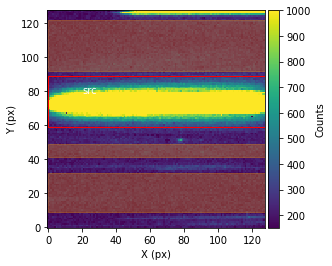

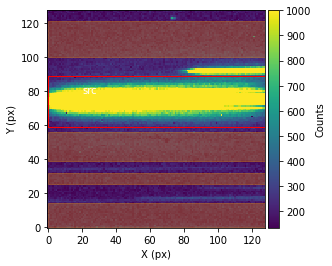

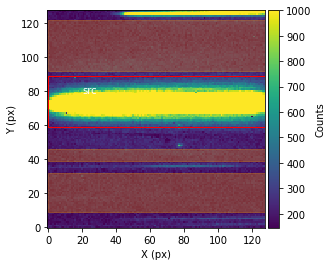

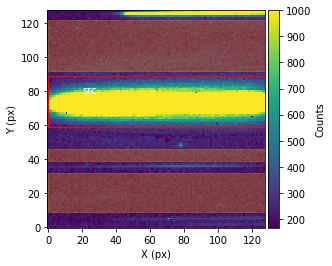

In [5]:
bspec.batch_run('showStarChoices',vmax=1000,showPlot=True)

In [6]:
bspec.batch_run('do_extraction',useMultiprocessing=True)

Working on do_extraction for batch CoRoT-1 corot1_visit1 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit2 


On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit3 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98


/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/phot_pipeline.py:2185: UserWarning: Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data
  warnings.warn("Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data")


On 90 of 98
Working on do_extraction for batch CoRoT-1 corot1_visit4 
On 0 of 98
On 15 of 98
On 30 of 98
On 45 of 98
On 60 of 98
On 75 of 98
On 90 of 98


Working on plot_one_spec for batch CoRoT-1 corot1_visit1 


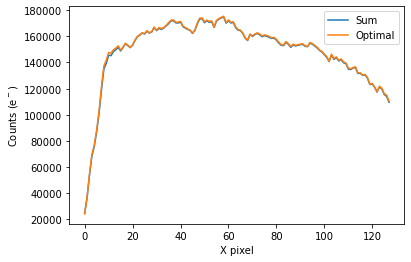

Working on plot_one_spec for batch CoRoT-1 corot1_visit2 


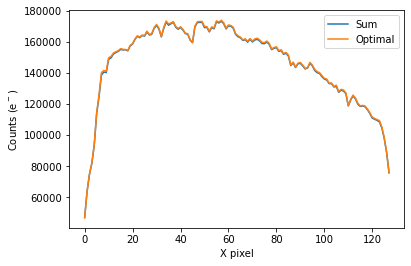

Working on plot_one_spec for batch CoRoT-1 corot1_visit3 


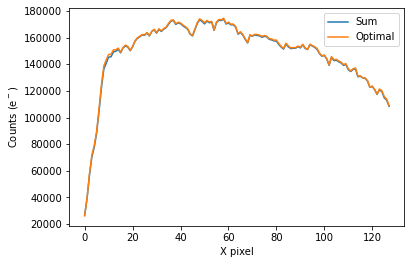

Working on plot_one_spec for batch CoRoT-1 corot1_visit4 


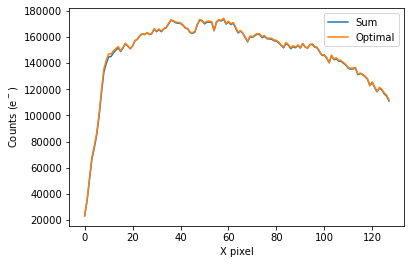

In [7]:
bspec.batch_run('plot_one_spec')

In [8]:
bspec.batch_run('plot_wavebin_series', nbins=1, interactive=True)

Working on plot_wavebin_series for batch CoRoT-1 corot1_visit1 


Working on plot_wavebin_series for batch CoRoT-1 corot1_visit2 


Working on plot_wavebin_series for batch CoRoT-1 corot1_visit3 


Working on plot_wavebin_series for batch CoRoT-1 corot1_visit4 


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit2 


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit3 


Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit4 


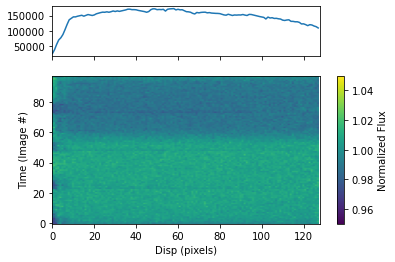

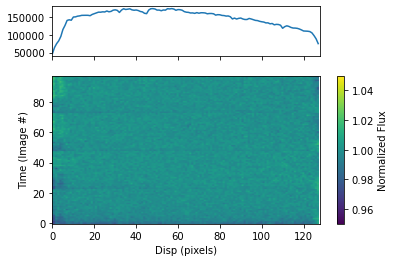

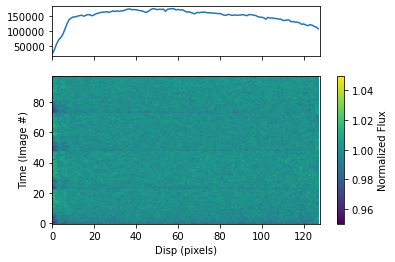

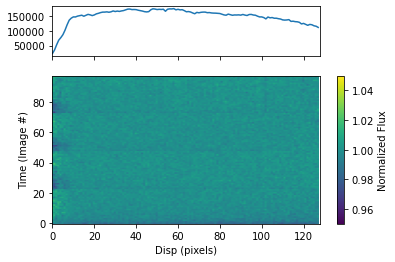

In [9]:
bspec.batch_run('plot_dynamic_spec', showPlot=True)

# Applying RECTE

In [10]:
#this convert all the data from the light curves into a table of values called result
result = bspec.batch_run('get_wavebin_series',nbins=10, recalculate=True)

Working on get_wavebin_series for batch CoRoT-1 corot1_visit1 
Working on get_wavebin_series for batch CoRoT-1 corot1_visit2 
Working on get_wavebin_series for batch CoRoT-1 corot1_visit3 
Working on get_wavebin_series for batch CoRoT-1 corot1_visit4 


## Organizing CoRoT-1b Visit 1 Data

In [11]:
#creating a table of data

#flux values
corot1_visit1_flux=result[0][0]
corot1_visit1_flux = corot1_visit1_flux.to_pandas()

#error flux values
corot1_visit1_errors = result[0][1]
corot1_visit1_errors = corot1_visit1_errors.to_pandas()

# place all flt files of the first visit into an array
corot1_visit1_files = os.listdir('/home/kglidic/Software/tshirt_files/tshirt/corot1_visit1/')
#remove the direct image from this array
corot1_visit1_files.remove('ibh717giq_flt.fits')
#make this a dataframe
corot1_visit1_files =pd.DataFrame(corot1_visit1_files,columns = ['file name'])

#time values for the first visit
corot1_visit1_added = Table()
time_visit1 = Time(corot1_visit1_flux['Time'],format='jd')
corot1_visit1_added['Time (UTC)'] = time_visit1.fits
corot1_visit1_added['Time'] = time_visit1.jd
time_visit1 = pd.DataFrame(corot1_visit1_added['Time (UTC)'])
ttime_visit1 = pd.DataFrame(corot1_visit1_added['Time'])

#Value of the exposure time which is the same for all visits in this case 
#To check this value:
#spec = bspec.return_spec_obj(ind=3)
#head = fits.getheader(spec.specFile,extname='ORIG HEADER')
#head['EXPTIME']
expTime=np.full((98, 1), 100.651947, dtype=np.float64)
expTime = pd.DataFrame(expTime,columns = ['Exp Time'])

#assign a number to the orbits 
orbit1 = np.full((23,1), 0, dtype=np.float64)
orbit2 = np.full((25,1), 1, dtype=np.float64)
orbit3 = np.full((25,1),2,dtype=np.float64)
orbit4 = np.full((25,1),3,dtype=np.float64)
orbits_visit1 = (orbit1,orbit2,orbit3,orbit4)
orbits_visit1 = np.concatenate(orbits_visit1)
orbits_visit1 = pd.DataFrame(orbits_visit1,columns = ['orbit'])

#the filter
Filter = np.full((98,1), 'G141')
Filter = pd.DataFrame(Filter,columns = ['Filter'])

In [12]:
merged=pd.merge(corot1_visit1_flux, corot1_visit1_errors, on=['Time'])
data = [corot1_visit1_files,time_visit1,ttime_visit1,expTime,orbits_visit1,Filter]
data_added= pd.concat(data,axis=1)
corot1_visit1_results=pd.merge(data_added,merged,on=['Time'])
corot1_visit1_results.to_csv('corot1_visit1_results.csv')
#corot1_visit1_results.to_csv('corot1_visit1_results.csv')
corot1_visit1_results

,file name,Time (UTC),Time,Exp Time,orbit,Filter,6.000um Flux,18.500um Flux,31.500um Flux,44.500um Flux,...,6.000um Error,18.500um Error,31.500um Error,44.500um Error,57.500um Error,70.000um Error,82.500um Error,95.500um Error,108.500um Error,121.500um Error
0,ibh717gjq_flt.fits,2012-01-23T21:46:18.000,2.455950e+06,100.651947,0.0,G141,0.990078,0.992096,0.992577,0.991598,...,0.000924,0.000745,0.000725,0.000709,0.000698,0.000764,0.000745,0.000746,0.000791,0.000854
1,ibh717gkq_flt.fits,2012-01-23T21:48:17.000,2.455950e+06,100.651947,0.0,G141,0.992980,0.996359,0.997907,0.998022,...,0.000925,0.000746,0.000726,0.000710,0.000700,0.000766,0.000746,0.000747,0.000792,0.000855
2,ibh717glq_flt.fits,2012-01-23T21:50:16.000,2.455950e+06,100.651947,0.0,G141,0.994512,1.000150,0.999594,0.998765,...,0.000925,0.000748,0.000727,0.000710,0.000699,0.000765,0.000746,0.000747,0.000791,0.000852
3,ibh717gmq_flt.fits,2012-01-23T21:52:15.000,2.455950e+06,100.651947,0.0,G141,0.996819,0.998468,0.999580,1.000112,...,0.000925,0.000747,0.000726,0.000710,0.000700,0.000766,0.000746,0.000747,0.000792,0.000853
4,ibh717gnq_flt.fits,2012-01-23T21:54:14.000,2.455950e+06,100.651947,0.0,G141,1.000799,1.000561,0.999999,1.001784,...,0.000925,0.000747,0.000727,0.000711,0.000700,0.000766,0.000747,0.000747,0.000792,0.000853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ibh717klq_flt.fits,2012-01-24T03:09:26.000,2.455951e+06,100.651947,3.0,G141,0.994567,0.987520,0.987272,0.987310,...,0.000924,0.000742,0.000721,0.000705,0.000695,0.000760,0.000741,0.000742,0.000787,0.000848
94,ibh717kmq_flt.fits,2012-01-24T03:11:25.000,2.455951e+06,100.651947,3.0,G141,0.996456,0.988577,0.987704,0.990260,...,0.000925,0.000744,0.000722,0.000706,0.000696,0.000761,0.000742,0.000743,0.000787,0.000847
95,ibh717knq_flt.fits,2012-01-24T03:13:24.000,2.455951e+06,100.651947,3.0,G141,0.998403,0.992179,0.990386,0.991515,...,0.000928,0.000743,0.000722,0.000707,0.000697,0.000762,0.000743,0.000743,0.000788,0.000849
96,ibh717koq_flt.fits,2012-01-24T03:15:23.000,2.455951e+06,100.651947,3.0,G141,0.999728,0.991095,0.993020,0.993746,...,0.000924,0.000744,0.000724,0.000707,0.000697,0.000763,0.000744,0.000745,0.000789,0.000849


## Creating a Median Image Visit 1

In [13]:
#get information from the header of one of the files in this visit
head = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/corot1_visit1/ibh717gjq_flt.fits',extname='SCI')
#head

In [14]:
#python order them from z,y,x:
cube3d = np.zeros([len(corot1_visit1_results),head['NAXIS2'],head['NAXIS1']])
cube3d.shape

(98, 128, 128)

In [15]:
#loop through all the image in this visit 
for ind,oneFile in enumerate(corot1_visit1_results['file name']):
    cube3d[ind,:,:] = fits.getdata("/home/kglidic/Software/tshirt_files/tshirt/corot1_visit1/{}".format(oneFile),extname='SCI')



(60.0, 80.0)

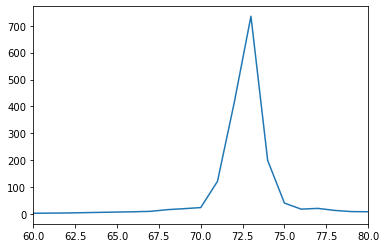

In [16]:
#view one of the images
%matplotlib inline
plt.plot(cube3d[15,:,40])
plt.xlim(60,80)

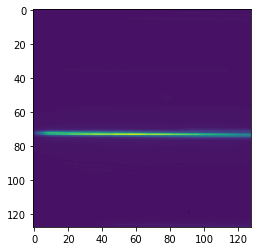

In [17]:
#create the median image and plot
medianImage = np.median(cube3d,axis=0)
plt.imshow(medianImage)

In [18]:
outHDU = fits.PrimaryHDU(medianImage,head)
#outHDU.writeto('corot1_visit1_median_image.fits')

## RECTE Example Code
CoRoT1-b Visit1

In [19]:
#! /usr/bin/env python
"""calculate RECTE model using a a template grism Image
"""
from __future__ import division, absolute_import
from __future__ import print_function
import numpy as np
import itertools

import matplotlib.pyplot as plt


def RECTE(
        cRates,
        tExp,
        exptime=100.651947,
        trap_pop_s=0,
        trap_pop_f=0,
        dTrap_s=0,
        dTrap_f=0,
        dt0=0,
        lost=0,
        mode='staring'
):
    """Hubble Space Telescope ramp effet model

    Parameters:
    cRates -- intrinsic count rate of each exposures, unit e/s
    tExp -- start time of every exposures
    expTime -- (default 180 seconds) exposure time of the time series
    trap_pop -- (default 0) number of occupied traps at the beginning of the observations
    dTrap -- (default [0])number of extra trap added in the gap
    between two orbits
    dt0 -- (default 0) possible exposures before very beginning, e.g.,
    possible guiding adjustment
    lost -- (default 0, no lost) proportion of trapped electrons that are not eventually detected
    (mode) -- (default scanning, scanning or staring, or others), for scanning mode
      observation , the pixel no longer receive photons during the overhead
      time, in staring mode, the pixel keps receiving elctrons
    """
    nTrap_s = 2192  # = 1525.38  # 1320.0
    eta_trap_s = 0.02075  # = 0.013318  # 0.01311
    tau_trap_s = 1.63e4  # = 1.63e4
    nTrap_f = 225.7  # = 162.38
    eta_trap_f = 0.0116  # = 0.008407
    tau_trap_f = 3344  # = 281.463
    # nTrap_s = 1525.38  # 1320.0
    # eta_trap_s = 0.013318  # 0.01311
    # tau_trap_s = 1.63e4
    # nTrap_f = 162.38
    # eta_trap_f = 0.008407
    # tau_trap_f = 281.463

    try:
        dTrap_f = itertools.cycle(dTrap_f)
        dTrap_s = itertools.cycle(dTrap_s)
        dt0 = itertools.cycle(dt0)
    except TypeError:
        dTrap_f = itertools.cycle([dTrap_f])
        dTrap_s = itertools.cycle([dTrap_s])
        dt0 = itertools.cycle([dt0])
    obsCounts = np.zeros(len(tExp))
    trap_pop_s = min(trap_pop_s, nTrap_s)
    trap_pop_f = min(trap_pop_f, nTrap_f)
    dEsList = np.zeros(len(tExp))
    dEfList = np.zeros(len(tExp))
    dt0_i = next(dt0)
    f0 = cRates[0]
    c1_s = eta_trap_s * f0 / nTrap_s + 1 / tau_trap_s  # a key factor
    c1_f = eta_trap_f * f0 / nTrap_f + 1 / tau_trap_f
    dE0_s = (eta_trap_s * f0 / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
    dE0_f = (eta_trap_f * f0 / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
    dE0_s = min(trap_pop_s + dE0_s, nTrap_s) - trap_pop_s
    dE0_f = min(trap_pop_f + dE0_f, nTrap_f) - trap_pop_f
    trap_pop_s = min(trap_pop_s + dE0_s, nTrap_s)
    trap_pop_f = min(trap_pop_f + dE0_f, nTrap_f)
    for i in range(len(tExp)):
        try:
            dt = tExp[i+1] - tExp[i]
        except IndexError:
            dt = exptime
        f_i = cRates[i]
        c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
        c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
        # number of trapped electron during one exposure
        dE1_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * exptime))
        dE1_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * exptime))
        dE1_s = min(trap_pop_s + dE1_s, nTrap_s) - trap_pop_s
        dE1_f = min(trap_pop_f + dE1_f, nTrap_f) - trap_pop_f
        trap_pop_s = min(trap_pop_s + dE1_s, nTrap_s)
        trap_pop_f = min(trap_pop_f + dE1_f, nTrap_f)
        obsCounts[i] = f_i * exptime - dE1_s - dE1_f
        if dt < 5 * exptime:  # whether next exposure is in next batch of exposures
            # same orbits
            if mode == 'scanning':
                # scanning mode, no incoming flux between exposures
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
                dEsList[i] = dE1_s + dE2_s
                dEfList[i] = dE1_f + dE2_f
            elif mode == 'staring':
                # for staring mode, there is flux between exposures
                dE2_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * (dt - exptime)))
                dE2_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * (dt - exptime)))
            else:
                # others, same as scanning
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
            trap_pop_s = min(trap_pop_s + dE2_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE2_f, nTrap_f)
        elif dt < 1200:
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime)/tau_trap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime)/tau_trap_f), nTrap_f)
        else:
            # switch orbit
            dt0_i = next(dt0)
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime-dt0_i)/tau_trap_s) + next(dTrap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime-dt0_i)/tau_trap_f) + next(dTrap_f), nTrap_f)
            f_i = cRates[i + 1]
            c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
            c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
            dE3_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
            dE3_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
            dE3_s = min(trap_pop_s + dE3_s, nTrap_s) - trap_pop_s
            dE3_f = min(trap_pop_f + dE3_f, nTrap_f) - trap_pop_f
            trap_pop_s = min(trap_pop_s + dE3_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE3_f, nTrap_f)
        trap_pop_s = max(trap_pop_s, 0)
        trap_pop_f = max(trap_pop_f, 0)

    return obsCounts

In [20]:
def RECTEMulti(template,
                 variability,
                 tExp,
                 exptime,
                 trap_pop_s=0,
                 trap_pop_f=0,
                 dTrap_s=0,
                 dTrap_f=0,
                 dt0=0,
                 mode='staring'):
    """loop through every pixel in the template
    calculate for 6 orbit
    return
    model light curves

    template -- a template image of the input sereis
    variablities -- normalized model light curves
    tExp -- starting times of each exposure of the time resolved observations
    trap_pop_s -- (default=0)number of initially occupied traps -- slow poplulation
    trap_pop_f -- number of initially occupied traps -- fast poplulation
    dTrap_s -- (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    dTrap_f -- (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    """
    specShape = template.shape
    outSpec = np.zeros((specShape[0], len(tExp)))
    for i in range(specShape[0]):
        outSpec[i, :] = RECTE(
            variability * template[i],
            tExp,
            exptime,
            trap_pop_s,
            trap_pop_f,
            dTrap_s=dTrap_s,
            dTrap_f=dTrap_f,
            dt0=dt0,
            lost=0,
            mode=mode)
    return np.sum(outSpec, axis=(0))

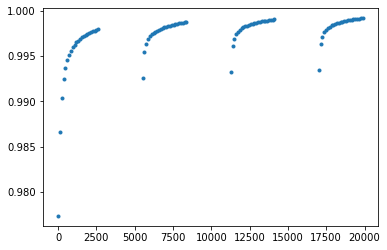

In [21]:
if __name__ == '__main__':
    import pandas as pd
    from astropy.io import fits
    import pickle
    info = pd.read_csv(
        'corot1_visit1_results.csv',
        parse_dates=True,
        index_col='Time (UTC)')
    info['Time'] = np.float32(info.index - info.index.values[0]) / 1e9
    grismInfo = info[info['Filter'] == 'G141']
    exptime = grismInfo['Exp Time'].values[0]
    tExp = grismInfo['Time'].values
    tExp = tExp - tExp[0]
    # cRates = np.ones(len(LC)) * LC.mean() * 1.002
    cRates = np.ones(len(tExp))
    variability = cRates / cRates.mean()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = fits.getdata('corot1_visit1_median_image.fits')
    bbox = [0, 128, 59, 89]  # define the bounding box of the area of interest
    xList = np.arange(bbox[0], bbox[1])
    ramps = np.zeros((len(xList), len(tExp)))
    dTrap_fList = [0]
    dTrap_sList = [0]
    dtList = [0]
    full_well = 8e4
    for i, x in enumerate(xList):
        template = im[bbox[2]:bbox[3], x]
        for j, flux in enumerate(template):
            if flux * exptime > full_well:
                template[j] = full_well / exptime

        obs = RECTEMulti(template, variability, tExp, exptime,
                         dTrap_f=dTrap_fList,
                         dTrap_s=dTrap_sList,
                         trap_pop_f=0,
                         trap_pop_s=0,
                         dt0=dtList,
                         mode='staring')
        obs = obs / exptime / np.nansum(template)
        # ax.plot(tExp, obs, '.', color='0.8', ms=1)
        ramps[i, :] = obs
    ax.plot(tExp, ramps[30, :], '.')
    plt.show()

In [22]:
def charge_correction(self):
    HDUList = fits.open(self.specFile)
    origData = HDUList['OPTIMAL SPEC'].data
    
    newData = deepcopy(origData)
    newData[0,:,:] = origData[0,:,:] / ramps.transpose()
    
    HDUList['OPTIMAL SPEC'].data = newData
    correctedSpecFile = os.path.splitext(self.specFile)[0]+'_corrected.fits'
    HDUList.writeto(correctedSpecFile,overwrite=True)
    
    new_param = deepcopy(self.param)
    new_param['srcNameShort'] = 'corot1_corrected'
    new_spec = spec_pipeline.spec(directParam=new_param)
    new_spec.specFile = correctedSpecFile

    
    return newData,new_spec

In [23]:
spec_v1 = bspec.return_spec_obj(ind=0)
spec_v1.specFile

'./tser_data/spec/spec_corot1_visit1.fits'

In [24]:
correcteddata_v1, new_spec_v1 = charge_correction(spec_v1)
correcteddata_v1

array([[[ 24188.9298413 ,  37065.8531304 ,  54368.08861169, ...,
         119038.38993545, 116528.25663757, 112374.06254434],
        [ 24123.98673818,  36773.39629594,  54792.20167691, ...,
         118141.71028422, 116246.6423458 , 112795.91678982],
        [ 24010.26227649,  36808.23210877,  54485.68957222, ...,
         117691.28773206, 115401.57564147, 111753.9928053 ],
        ...,
        [ 24626.77493361,  38024.57814472,  55398.4649313 , ...,
         115192.68406012, 113204.01933425, 108277.6974091 ],
        [ 24752.51549949,  37445.26193363,  54539.32924608, ...,
         115816.66787992, 112417.75295799, 108803.62702301],
        [ 24334.75842287,  37451.38548086,  54733.60990183, ...,
         115971.30770875, 113788.22040246, 108893.34975306]]])

In [25]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#new_spec.dyn_specFile()
#spec.dyn_specFile()

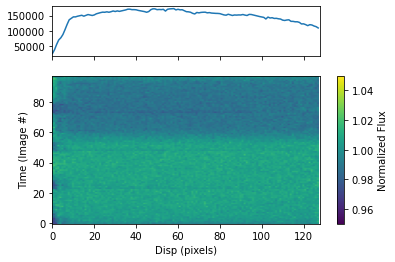

In [26]:
#checking the original dynamic spectrum 
spec_v1.plot_dynamic_spec(showPlot=True)

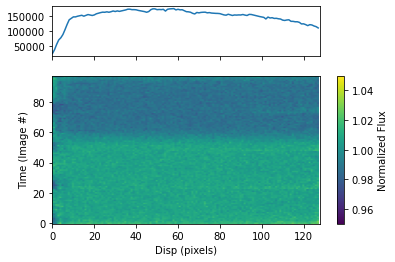

In [27]:
#checking the new dynamic spectrum 
new_spec_v1.plot_dynamic_spec(showPlot=True)

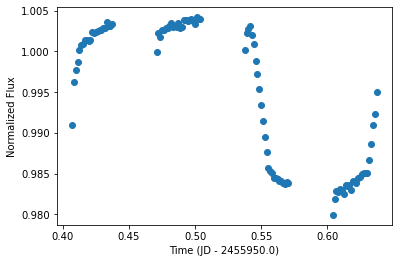

In [28]:
#original light curve
spec_v1.plot_wavebin_series(nbins=1,savePlot=False)

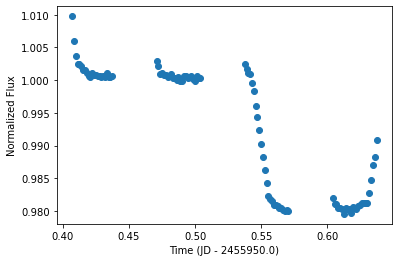

In [29]:
#new light curve
new_spec_v1.plot_wavebin_series(nbins=1,savePlot=False)

## Organizing CoRoT-1b Visit 2 Data

In [30]:
#creating a table of data

#flux values
corot1_visit2_flux=result[1][0]
corot1_visit2_flux = corot1_visit2_flux.to_pandas()

#error flux values
corot1_visit2_errors = result[1][1]
corot1_visit2_errors = corot1_visit2_errors.to_pandas()

# place all flt files of the first visit into an array
corot1_visit2_files = os.listdir('/home/kglidic/Software/tshirt_files/tshirt/corot1_visit2/')
#remove the direct image from this array
corot1_visit2_files.remove('ibh719gkq_flt.fits')

#make this a dataframe
corot1_visit2_files =pd.DataFrame(corot1_visit2_files,columns = ['file name'])

#time values for the first visit
corot1_visit2_added = Table()
time_visit2 = Time(corot1_visit2_flux['Time'],format='jd')
corot1_visit2_added['Time (UTC)'] = time_visit2.fits
corot1_visit2_added['Time'] = time_visit2.jd
time_visit2 = pd.DataFrame(corot1_visit2_added['Time (UTC)'])
ttime_visit2 = pd.DataFrame(corot1_visit2_added['Time'])

#Value of the exposure time which is the same for all visits in this case 
#To check this value:
#spec = bspec.return_spec_obj(ind=3)
#head = fits.getheader(spec.specFile,extname='ORIG HEADER')
#head['EXPTIME']
expTime=np.full((98, 1), 100.651947, dtype=np.float64)
expTime = pd.DataFrame(expTime,columns = ['Exp Time'])

#assign a number to the orbits 
orbit1 = np.full((23,1), 0, dtype=np.float64)
orbit2 = np.full((25,1), 1, dtype=np.float64)
orbit3 = np.full((25,1),2,dtype=np.float64)
orbit4 = np.full((25,1),3,dtype=np.float64)
orbits_visit2 = (orbit1,orbit2,orbit3,orbit4)
orbits_visit2 = np.concatenate(orbits_visit2)
orbits_visit2 = pd.DataFrame(orbits_visit2,columns = ['orbit'])

#the filter
Filter = np.full((98,1), 'G141')
Filter = pd.DataFrame(Filter,columns = ['Filter'])

In [31]:
merged2=pd.merge(corot1_visit2_flux, corot1_visit2_errors, on=['Time'])
data2 = [corot1_visit2_files,time_visit2,ttime_visit2,expTime,orbits_visit2,Filter]
data_added2= pd.concat(data2,axis=1)
corot1_visit2_results=pd.merge(data_added2,merged2,on=['Time'])
corot1_visit2_results.to_csv('corot1_visit2_results.csv')
#corot1_visit2_results.to_csv('corot1_visit2_results.csv')
corot1_visit2_results

,file name,Time (UTC),Time,Exp Time,orbit,Filter,6.000um Flux,18.500um Flux,31.500um Flux,44.500um Flux,...,6.000um Error,18.500um Error,31.500um Error,44.500um Error,57.500um Error,70.000um Error,82.500um Error,95.500um Error,108.500um Error,121.500um Error
0,ibh719gmq_flt.fits,2012-01-17T02:54:26.000,2.455944e+06,100.651947,0.0,G141,0.981850,0.981911,0.984620,0.986791,...,0.000526,0.000453,0.000437,0.000434,0.000430,0.000465,0.000457,0.000473,0.000506,0.000551
1,ibh719gnq_flt.fits,2012-01-17T02:56:25.000,2.455944e+06,100.651947,0.0,G141,0.985495,0.990325,0.990208,0.990953,...,0.000538,0.000453,0.000437,0.000436,0.000431,0.000466,0.000458,0.000474,0.000507,0.000553
2,ibh719goq_flt.fits,2012-01-17T02:58:24.000,2.455944e+06,100.651947,0.0,G141,0.990032,0.992031,0.994101,0.994937,...,0.000535,0.000452,0.000438,0.000437,0.000431,0.000466,0.000458,0.000475,0.000507,0.000553
3,ibh719gpq_flt.fits,2012-01-17T03:00:23.000,2.455944e+06,100.651947,0.0,G141,0.990267,0.994318,0.994306,0.994915,...,0.000536,0.000454,0.000438,0.000436,0.000431,0.000467,0.000458,0.000475,0.000508,0.000554
4,ibh719gqq_flt.fits,2012-01-17T03:02:22.000,2.455944e+06,100.651947,0.0,G141,0.990388,0.995797,0.997069,0.994620,...,0.000540,0.000455,0.000439,0.000436,0.000431,0.000467,0.000458,0.000475,0.000508,0.000553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ibh719k6q_flt.fits,2012-01-17T08:17:33.000,2.455944e+06,100.651947,3.0,G141,1.003018,0.999579,1.000639,1.000524,...,0.000545,0.000454,0.000439,0.000438,0.000432,0.000467,0.000459,0.000476,0.000509,0.000554
94,ibh719k7q_flt.fits,2012-01-17T08:19:32.000,2.455944e+06,100.651947,3.0,G141,1.002892,1.000012,1.000408,1.001453,...,0.000545,0.000455,0.000439,0.000437,0.000432,0.000467,0.000459,0.000476,0.000509,0.000555
95,ibh719k8q_flt.fits,2012-01-17T08:21:31.000,2.455944e+06,100.651947,3.0,G141,1.004602,0.999815,1.000996,1.000676,...,0.000531,0.000457,0.000441,0.000437,0.000432,0.000468,0.000459,0.000476,0.000508,0.000555
96,ibh719k9q_flt.fits,2012-01-17T08:23:30.000,2.455944e+06,100.651947,3.0,G141,1.005279,1.000214,0.999674,1.000140,...,0.000544,0.000454,0.000439,0.000438,0.000432,0.000468,0.000459,0.000476,0.000510,0.000554


## Creating a Median Image Visit 2

In [32]:
#get information from the header of one of the files in this visit
head_visit2 = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/corot1_visit2/ibh719gkq_flt.fits',extname='SCI')
#head

In [33]:
#python order them from z,y,x:
cube3d_visit2 = np.zeros([len(corot1_visit2_results),head_visit2['NAXIS2'],head_visit2['NAXIS1']])
cube3d_visit2.shape

(98, 128, 128)

In [34]:
#loop through all the image in this visit 
for ind,oneFile in enumerate(corot1_visit2_results['file name']):
    cube3d_visit2[ind,:,:] = fits.getdata("/home/kglidic/Software/tshirt_files/tshirt/corot1_visit2/{}".format(oneFile),extname='SCI')

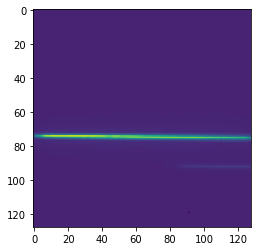

In [35]:
#view one of the images
#%matplotlib inline
#plt.plot(cube3d_v2[15,:,40])
#plt.xlim(60,80)

#create the median image and plot
medianImage_visit2 = np.median(cube3d_visit2,axis=0)
plt.imshow(medianImage_visit2)

In [36]:
outHDU_visit2 = fits.PrimaryHDU(medianImage_visit2,head_visit2)
#outHDU_visit2.writeto('corot1_visit2_median_image.fits')

## RECTE Example Code
CoRoT1-b Visit2

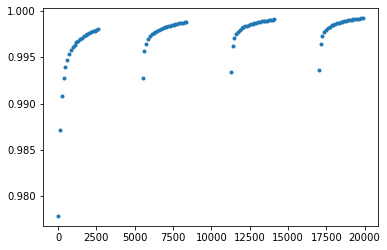

In [37]:
#! /usr/bin/env python
"""calculate RECTE model using a a template grism Image
"""
from __future__ import division, absolute_import
from __future__ import print_function
import numpy as np
import itertools

import matplotlib.pyplot as plt


def RECTE(
        cRates,
        tExp,
        exptime=100.651947,
        trap_pop_s=0,
        trap_pop_f=0,
        dTrap_s=0,
        dTrap_f=0,
        dt0=0,
        lost=0,
        mode='staring'
):
    """Hubble Space Telescope ramp effet model

    Parameters:
    cRates -- intrinsic count rate of each exposures, unit e/s
    tExp -- start time of every exposures
    expTime -- (default 180 seconds) exposure time of the time series
    trap_pop -- (default 0) number of occupied traps at the beginning of the observations
    dTrap -- (default [0])number of extra trap added in the gap
    between two orbits
    dt0 -- (default 0) possible exposures before very beginning, e.g.,
    possible guiding adjustment
    lost -- (default 0, no lost) proportion of trapped electrons that are not eventually detected
    (mode) -- (default scanning, scanning or staring, or others), for scanning mode
      observation , the pixel no longer receive photons during the overhead
      time, in staring mode, the pixel keps receiving elctrons
    """
    nTrap_s = 2192  # = 1525.38  # 1320.0
    eta_trap_s = 0.02075  # = 0.013318  # 0.01311
    tau_trap_s = 1.63e4  # = 1.63e4
    nTrap_f = 225.7  # = 162.38
    eta_trap_f = 0.0116  # = 0.008407
    tau_trap_f = 3344  # = 281.463
    # nTrap_s = 1525.38  # 1320.0
    # eta_trap_s = 0.013318  # 0.01311
    # tau_trap_s = 1.63e4
    # nTrap_f = 162.38
    # eta_trap_f = 0.008407
    # tau_trap_f = 281.463

    try:
        dTrap_f = itertools.cycle(dTrap_f)
        dTrap_s = itertools.cycle(dTrap_s)
        dt0 = itertools.cycle(dt0)
    except TypeError:
        dTrap_f = itertools.cycle([dTrap_f])
        dTrap_s = itertools.cycle([dTrap_s])
        dt0 = itertools.cycle([dt0])
    obsCounts = np.zeros(len(tExp))
    trap_pop_s = min(trap_pop_s, nTrap_s)
    trap_pop_f = min(trap_pop_f, nTrap_f)
    dEsList = np.zeros(len(tExp))
    dEfList = np.zeros(len(tExp))
    dt0_i = next(dt0)
    f0 = cRates[0]
    c1_s = eta_trap_s * f0 / nTrap_s + 1 / tau_trap_s  # a key factor
    c1_f = eta_trap_f * f0 / nTrap_f + 1 / tau_trap_f
    dE0_s = (eta_trap_s * f0 / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
    dE0_f = (eta_trap_f * f0 / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
    dE0_s = min(trap_pop_s + dE0_s, nTrap_s) - trap_pop_s
    dE0_f = min(trap_pop_f + dE0_f, nTrap_f) - trap_pop_f
    trap_pop_s = min(trap_pop_s + dE0_s, nTrap_s)
    trap_pop_f = min(trap_pop_f + dE0_f, nTrap_f)
    for i in range(len(tExp)):
        try:
            dt = tExp[i+1] - tExp[i]
        except IndexError:
            dt = exptime
        f_i = cRates[i]
        c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
        c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
        # number of trapped electron during one exposure
        dE1_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * exptime))
        dE1_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * exptime))
        dE1_s = min(trap_pop_s + dE1_s, nTrap_s) - trap_pop_s
        dE1_f = min(trap_pop_f + dE1_f, nTrap_f) - trap_pop_f
        trap_pop_s = min(trap_pop_s + dE1_s, nTrap_s)
        trap_pop_f = min(trap_pop_f + dE1_f, nTrap_f)
        obsCounts[i] = f_i * exptime - dE1_s - dE1_f
        if dt < 5 * exptime:  # whether next exposure is in next batch of exposures
            # same orbits
            if mode == 'scanning':
                # scanning mode, no incoming flux between exposures
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
                dEsList[i] = dE1_s + dE2_s
                dEfList[i] = dE1_f + dE2_f
            elif mode == 'staring':
                # for staring mode, there is flux between exposures
                dE2_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * (dt - exptime)))
                dE2_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * (dt - exptime)))
            else:
                # others, same as scanning
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
            trap_pop_s = min(trap_pop_s + dE2_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE2_f, nTrap_f)
        elif dt < 1200:
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime)/tau_trap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime)/tau_trap_f), nTrap_f)
        else:
            # switch orbit
            dt0_i = next(dt0)
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime-dt0_i)/tau_trap_s) + next(dTrap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime-dt0_i)/tau_trap_f) + next(dTrap_f), nTrap_f)
            f_i = cRates[i + 1]
            c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
            c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
            dE3_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
            dE3_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
            dE3_s = min(trap_pop_s + dE3_s, nTrap_s) - trap_pop_s
            dE3_f = min(trap_pop_f + dE3_f, nTrap_f) - trap_pop_f
            trap_pop_s = min(trap_pop_s + dE3_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE3_f, nTrap_f)
        trap_pop_s = max(trap_pop_s, 0)
        trap_pop_f = max(trap_pop_f, 0)

    return obsCounts

def RECTEMulti(template,
                 variability,
                 tExp,
                 exptime,
                 trap_pop_s=0,
                 trap_pop_f=0,
                 dTrap_s=0,
                 dTrap_f=0,
                 dt0=0,
                 mode='staring'):
    """loop through every pixel in the template
    calculate for 6 orbit
    return
    model light curves

    template -- a template image of the input sereis
    variablities -- normalized model light curves
    tExp -- starting times of each exposure of the time resolved observations
    trap_pop_s -- (default=0)number of initially occupied traps -- slow poplulation
    trap_pop_f -- number of initially occupied traps -- fast poplulation
    dTrap_s -- (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    dTrap_f -- (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    """
    specShape = template.shape
    outSpec = np.zeros((specShape[0], len(tExp)))
    for i in range(specShape[0]):
        outSpec[i, :] = RECTE(
            variability * template[i],
            tExp,
            exptime,
            trap_pop_s,
            trap_pop_f,
            dTrap_s=dTrap_s,
            dTrap_f=dTrap_f,
            dt0=dt0,
            lost=0,
            mode=mode)
    return np.sum(outSpec, axis=(0))

if __name__ == '__main__':
    import pandas as pd
    from astropy.io import fits
    import pickle
    info = pd.read_csv(
        'corot1_visit2_results.csv',
        parse_dates=True,
        index_col='Time (UTC)')
    info['Time'] = np.float32(info.index - info.index.values[0]) / 1e9
    grismInfo = info[info['Filter'] == 'G141']
    exptime = grismInfo['Exp Time'].values[0]
    tExp = grismInfo['Time'].values
    tExp = tExp - tExp[0]
    # cRates = np.ones(len(LC)) * LC.mean() * 1.002
    cRates = np.ones(len(tExp))
    variability = cRates / cRates.mean()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = fits.getdata('corot1_visit2_median_image.fits')
    bbox = [0, 128, 59, 89]  # define the bounding box of the area of interest
    xList = np.arange(bbox[0], bbox[1])
    ramps = np.zeros((len(xList), len(tExp)))
    dTrap_fList = [0]
    dTrap_sList = [0]
    dtList = [0]
    full_well = 8e4
    for i, x in enumerate(xList):
        template = im[bbox[2]:bbox[3], x]
        for j, flux in enumerate(template):
            if flux * exptime > full_well:
                template[j] = full_well / exptime

        obs = RECTEMulti(template, variability, tExp, exptime,
                         dTrap_f=dTrap_fList,
                         dTrap_s=dTrap_sList,
                         trap_pop_f=0,
                         trap_pop_s=0,
                         dt0=dtList,
                         mode='staring')
        obs = obs / exptime / np.nansum(template)
        # ax.plot(tExp, obs, '.', color='0.8', ms=1)
        ramps[i, :] = obs
    ax.plot(tExp, ramps[30, :], '.')
    plt.show()

In [38]:
def charge_correction(self):
    HDUList = fits.open(self.specFile)
    origData = HDUList['OPTIMAL SPEC'].data
    
    newData = deepcopy(origData)
    newData[0,:,:] = origData[0,:,:] / ramps.transpose()
    
    HDUList['OPTIMAL SPEC'].data = newData
    correctedSpecFile = os.path.splitext(self.specFile)[0]+'_corrected.fits'
    HDUList.writeto(correctedSpecFile,overwrite=True)
    
    new_param = deepcopy(self.param)
    new_param['srcNameShort'] = 'corot1_corrected'
    new_spec = spec_pipeline.spec(directParam=new_param)
    new_spec.specFile = correctedSpecFile

    
    return newData,new_spec

In [39]:
spec_v2 = bspec.return_spec_obj(ind=1)
spec_v2.specFile

'./tser_data/spec/spec_corot1_visit2.fits'

In [40]:
correcteddata_v2, new_spec_v2 = charge_correction(spec_v2)
correcteddata_v2

array([[[46529.39917936, 64331.68621374, 76169.63725729, ...,
         99936.6782875 , 90646.34685428, 77899.53966428],
        [46283.85582889, 63634.20379567, 75283.12695726, ...,
         98729.46357781, 90426.52551659, 77397.55551112],
        [46116.7640325 , 64095.87949762, 75118.02885917, ...,
         98574.29344032, 90082.03395316, 76797.55726164],
        ...,
        [48577.73183049, 65735.2130069 , 75961.48090124, ...,
         97494.42558268, 88288.11679748, 74859.61189802],
        [48667.90107097, 65524.41011362, 75536.06682056, ...,
         97356.24851298, 88195.52304723, 74082.42445314],
        [47504.35440396, 65228.1781207 , 75823.7290129 , ...,
         97230.86221834, 88137.17964692, 74951.91697308]]])

In [41]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#print(new_spec_v2.dyn_specFile())
#print(spec_v2.dyn_specFile())

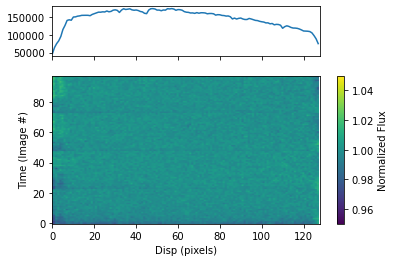

In [42]:
#checking the original dynamic spectrum 
spec_v2.plot_dynamic_spec(showPlot=True)

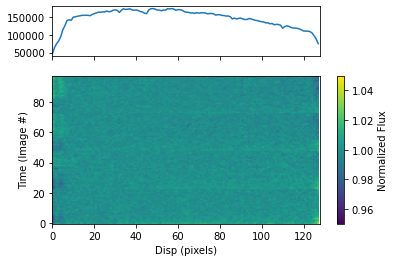

In [43]:
#checking the new dynamic spectrum 
new_spec_v2.plot_dynamic_spec(showPlot=True)

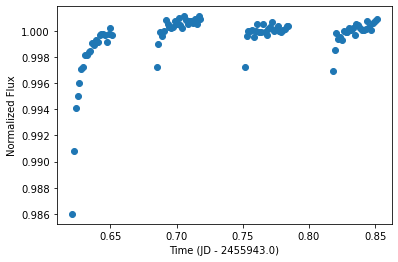

In [44]:
#original light curve
spec_v2.plot_wavebin_series(nbins=1,savePlot=False)

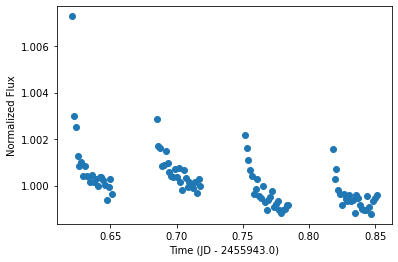

In [45]:
#new light curve
new_spec_v2.plot_wavebin_series(nbins=1,savePlot=False)

## Organizing CoRoT-1b Visit 3 Data

In [46]:
#creating a table of data

#flux values
corot1_visit3_flux=result[2][0]
corot1_visit3_flux = corot1_visit3_flux.to_pandas()

#error flux values
corot1_visit3_errors = result[2][1]
corot1_visit3_errors = corot1_visit3_errors.to_pandas()

# place all flt files of the first visit into an array
corot1_visit3_files = os.listdir('/home/kglidic/Software/tshirt_files/tshirt/corot1_visit3/')
#remove the direct image from this array
corot1_visit3_files.remove('ibh720i5q_flt.fits')

#make this a dataframe
corot1_visit3_files =pd.DataFrame(corot1_visit3_files,columns = ['file name'])

#time values for the first visit
corot1_visit3_added = Table()
time_visit3 = Time(corot1_visit3_flux['Time'],format='jd')
corot1_visit3_added['Time (UTC)'] = time_visit3.fits
corot1_visit3_added['Time'] = time_visit3.jd
time_visit3 = pd.DataFrame(corot1_visit3_added['Time (UTC)'])
ttime_visit3 = pd.DataFrame(corot1_visit3_added['Time'])

#Value of the exposure time which is the same for all visits in this case 
#To check this value:
#spec = bspec.return_spec_obj(ind=3)
#head = fits.getheader(spec.specFile,extname='ORIG HEADER')
#head['EXPTIME']
expTime=np.full((98, 1), 100.651947, dtype=np.float64)
expTime = pd.DataFrame(expTime,columns = ['Exp Time'])

#assign a number to the orbits 
orbit1 = np.full((23,1), 0, dtype=np.float64)
orbit2 = np.full((25,1), 1, dtype=np.float64)
orbit3 = np.full((25,1),2,dtype=np.float64)
orbit4 = np.full((25,1),3,dtype=np.float64)
orbits_visit3 = (orbit1,orbit2,orbit3,orbit4)
orbits_visit3 = np.concatenate(orbits_visit3)
orbits_visit3 = pd.DataFrame(orbits_visit3,columns = ['orbit'])

#the filter
Filter = np.full((98,1), 'G141')
Filter = pd.DataFrame(Filter,columns = ['Filter'])

In [47]:
merged3=pd.merge(corot1_visit3_flux, corot1_visit3_errors, on=['Time'])
data3 = [corot1_visit3_files,time_visit3,ttime_visit3,expTime,orbits_visit3,Filter]
data_added3= pd.concat(data3,axis=1)
corot1_visit3_results=pd.merge(data_added3,merged3,on=['Time'])
corot1_visit3_results.to_csv('corot1_visit3_results.csv')
#corot1_visit3_results.to_csv('corot1_visit3_results.csv')
corot1_visit3_results

,file name,Time (UTC),Time,Exp Time,orbit,Filter,6.000um Flux,18.500um Flux,31.500um Flux,44.500um Flux,...,6.000um Error,18.500um Error,31.500um Error,44.500um Error,57.500um Error,70.000um Error,82.500um Error,95.500um Error,108.500um Error,121.500um Error
0,ibh720i6q_flt.fits,2012-01-27T16:43:33.000,2.455954e+06,100.651947,0.0,G141,0.985077,0.989921,0.990486,0.990950,...,0.000542,0.000455,0.000444,0.000434,0.000429,0.000468,0.000456,0.000457,0.000482,0.000518
1,ibh720i7q_flt.fits,2012-01-27T16:45:32.000,2.455954e+06,100.651947,0.0,G141,0.990555,0.992975,0.993995,0.996040,...,0.000541,0.000455,0.000444,0.000434,0.000429,0.000469,0.000456,0.000457,0.000483,0.000519
2,ibh720i8q_flt.fits,2012-01-27T16:47:31.000,2.455954e+06,100.651947,0.0,G141,0.991855,0.996818,0.994435,0.997742,...,0.000546,0.000456,0.000445,0.000435,0.000429,0.000469,0.000456,0.000458,0.000483,0.000518
3,ibh720i9q_flt.fits,2012-01-27T16:49:30.000,2.455954e+06,100.651947,0.0,G141,0.994337,0.995399,0.996306,0.997493,...,0.000543,0.000457,0.000445,0.000434,0.000429,0.000469,0.000456,0.000457,0.000482,0.000519
4,ibh720iaq_flt.fits,2012-01-27T16:51:29.000,2.455954e+06,100.651947,0.0,G141,0.995230,0.998120,0.998197,0.997671,...,0.000542,0.000455,0.000444,0.000434,0.000429,0.000468,0.000456,0.000457,0.000482,0.000518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ibh720kyq_flt.fits,2012-01-27T22:10:39.000,2.455954e+06,100.651947,3.0,G141,0.998995,1.000024,0.999910,1.001533,...,0.000545,0.000456,0.000445,0.000435,0.000429,0.000469,0.000457,0.000458,0.000482,0.000518
94,ibh720kzq_flt.fits,2012-01-27T22:12:38.000,2.455954e+06,100.651947,3.0,G141,1.000132,1.001217,1.000851,1.001232,...,0.000550,0.000457,0.000445,0.000435,0.000429,0.000469,0.000457,0.000458,0.000483,0.000518
95,ibh720l0q_flt.fits,2012-01-27T22:14:37.000,2.455954e+06,100.651947,3.0,G141,1.000009,1.001043,1.000903,0.999602,...,0.000545,0.000459,0.000446,0.000434,0.000429,0.000469,0.000457,0.000458,0.000483,0.000519
96,ibh720l1q_flt.fits,2012-01-27T22:16:36.000,2.455954e+06,100.651947,3.0,G141,0.998944,1.000687,1.001807,1.000760,...,0.000545,0.000459,0.000446,0.000434,0.000429,0.000469,0.000457,0.000458,0.000483,0.000518


## Creating a Median Image Visit 3

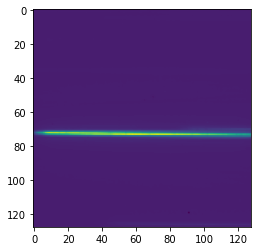

In [48]:
#get information from the header of one of the files in this visit
head_visit3 = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/corot1_visit3/ibh720i5q_flt.fits',extname='SCI')
#head

#python order them from z,y,x:
cube3d_visit3 = np.zeros([len(corot1_visit3_results),head_visit3['NAXIS2'],head_visit3['NAXIS1']])
cube3d_visit3.shape

#loop through all the image in this visit 
for ind,oneFile in enumerate(corot1_visit3_results['file name']):
    cube3d_visit3[ind,:,:] = fits.getdata("/home/kglidic/Software/tshirt_files/tshirt/corot1_visit3/{}".format(oneFile),extname='SCI')

#view one of the images
#%matplotlib inline
#plt.plot(cube3d_v2[15,:,40])
#plt.xlim(60,80)

#create the median image and plot
medianImage_visit3= np.median(cube3d_visit3,axis=0)
plt.imshow(medianImage_visit3)

outHDU_visit3 = fits.PrimaryHDU(medianImage_visit3,head_visit3)
#outHDU_visit3.writeto('corot1_visit3_median_image.fits')

## RECTE Example Code
CoRoT1-b Visit3

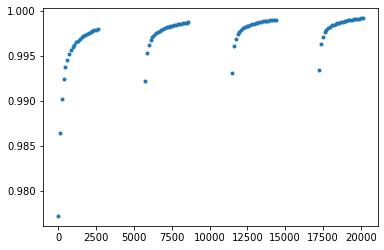

In [49]:
#! /usr/bin/env python
"""calculate RECTE model using a a template grism Image
"""
from __future__ import division, absolute_import
from __future__ import print_function
import numpy as np
import itertools

import matplotlib.pyplot as plt


def RECTE(
        cRates,
        tExp,
        exptime=100.651947,
        trap_pop_s=0,
        trap_pop_f=0,
        dTrap_s=0,
        dTrap_f=0,
        dt0=0,
        lost=0,
        mode='staring'
):
    """Hubble Space Telescope ramp effet model

    Parameters:
    cRates -- intrinsic count rate of each exposures, unit e/s
    tExp -- start time of every exposures
    expTime -- (default 180 seconds) exposure time of the time series
    trap_pop -- (default 0) number of occupied traps at the beginning of the observations
    dTrap -- (default [0])number of extra trap added in the gap
    between two orbits
    dt0 -- (default 0) possible exposures before very beginning, e.g.,
    possible guiding adjustment
    lost -- (default 0, no lost) proportion of trapped electrons that are not eventually detected
    (mode) -- (default scanning, scanning or staring, or others), for scanning mode
      observation , the pixel no longer receive photons during the overhead
      time, in staring mode, the pixel keps receiving elctrons
    """
    nTrap_s = 2192  # = 1525.38  # 1320.0
    eta_trap_s = 0.02075  # = 0.013318  # 0.01311
    tau_trap_s = 1.63e4  # = 1.63e4
    nTrap_f = 225.7  # = 162.38
    eta_trap_f = 0.0116  # = 0.008407
    tau_trap_f = 3344  # = 281.463
    # nTrap_s = 1525.38  # 1320.0
    # eta_trap_s = 0.013318  # 0.01311
    # tau_trap_s = 1.63e4
    # nTrap_f = 162.38
    # eta_trap_f = 0.008407
    # tau_trap_f = 281.463

    try:
        dTrap_f = itertools.cycle(dTrap_f)
        dTrap_s = itertools.cycle(dTrap_s)
        dt0 = itertools.cycle(dt0)
    except TypeError:
        dTrap_f = itertools.cycle([dTrap_f])
        dTrap_s = itertools.cycle([dTrap_s])
        dt0 = itertools.cycle([dt0])
    obsCounts = np.zeros(len(tExp))
    trap_pop_s = min(trap_pop_s, nTrap_s)
    trap_pop_f = min(trap_pop_f, nTrap_f)
    dEsList = np.zeros(len(tExp))
    dEfList = np.zeros(len(tExp))
    dt0_i = next(dt0)
    f0 = cRates[0]
    c1_s = eta_trap_s * f0 / nTrap_s + 1 / tau_trap_s  # a key factor
    c1_f = eta_trap_f * f0 / nTrap_f + 1 / tau_trap_f
    dE0_s = (eta_trap_s * f0 / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
    dE0_f = (eta_trap_f * f0 / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
    dE0_s = min(trap_pop_s + dE0_s, nTrap_s) - trap_pop_s
    dE0_f = min(trap_pop_f + dE0_f, nTrap_f) - trap_pop_f
    trap_pop_s = min(trap_pop_s + dE0_s, nTrap_s)
    trap_pop_f = min(trap_pop_f + dE0_f, nTrap_f)
    for i in range(len(tExp)):
        try:
            dt = tExp[i+1] - tExp[i]
        except IndexError:
            dt = exptime
        f_i = cRates[i]
        c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
        c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
        # number of trapped electron during one exposure
        dE1_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * exptime))
        dE1_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * exptime))
        dE1_s = min(trap_pop_s + dE1_s, nTrap_s) - trap_pop_s
        dE1_f = min(trap_pop_f + dE1_f, nTrap_f) - trap_pop_f
        trap_pop_s = min(trap_pop_s + dE1_s, nTrap_s)
        trap_pop_f = min(trap_pop_f + dE1_f, nTrap_f)
        obsCounts[i] = f_i * exptime - dE1_s - dE1_f
        if dt < 5 * exptime:  # whether next exposure is in next batch of exposures
            # same orbits
            if mode == 'scanning':
                # scanning mode, no incoming flux between exposures
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
                dEsList[i] = dE1_s + dE2_s
                dEfList[i] = dE1_f + dE2_f
            elif mode == 'staring':
                # for staring mode, there is flux between exposures
                dE2_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * (dt - exptime)))
                dE2_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * (dt - exptime)))
            else:
                # others, same as scanning
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
            trap_pop_s = min(trap_pop_s + dE2_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE2_f, nTrap_f)
        elif dt < 1200:
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime)/tau_trap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime)/tau_trap_f), nTrap_f)
        else:
            # switch orbit
            dt0_i = next(dt0)
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime-dt0_i)/tau_trap_s) + next(dTrap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime-dt0_i)/tau_trap_f) + next(dTrap_f), nTrap_f)
            f_i = cRates[i + 1]
            c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
            c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
            dE3_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
            dE3_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
            dE3_s = min(trap_pop_s + dE3_s, nTrap_s) - trap_pop_s
            dE3_f = min(trap_pop_f + dE3_f, nTrap_f) - trap_pop_f
            trap_pop_s = min(trap_pop_s + dE3_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE3_f, nTrap_f)
        trap_pop_s = max(trap_pop_s, 0)
        trap_pop_f = max(trap_pop_f, 0)

    return obsCounts

def RECTEMulti(template,
                 variability,
                 tExp,
                 exptime,
                 trap_pop_s=0,
                 trap_pop_f=0,
                 dTrap_s=0,
                 dTrap_f=0,
                 dt0=0,
                 mode='staring'):
    """loop through every pixel in the template
    calculate for 6 orbit
    return
    model light curves

    template -- a template image of the input sereis
    variablities -- normalized model light curves
    tExp -- starting times of each exposure of the time resolved observations
    trap_pop_s -- (default=0)number of initially occupied traps -- slow poplulation
    trap_pop_f -- number of initially occupied traps -- fast poplulation
    dTrap_s -- (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    dTrap_f -- (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    """
    specShape = template.shape
    outSpec = np.zeros((specShape[0], len(tExp)))
    for i in range(specShape[0]):
        outSpec[i, :] = RECTE(
            variability * template[i],
            tExp,
            exptime,
            trap_pop_s,
            trap_pop_f,
            dTrap_s=dTrap_s,
            dTrap_f=dTrap_f,
            dt0=dt0,
            lost=0,
            mode=mode)
    return np.sum(outSpec, axis=(0))

if __name__ == '__main__':
    import pandas as pd
    from astropy.io import fits
    import pickle
    info = pd.read_csv(
        'corot1_visit3_results.csv',
        parse_dates=True,
        index_col='Time (UTC)')
    info['Time'] = np.float32(info.index - info.index.values[0]) / 1e9
    grismInfo = info[info['Filter'] == 'G141']
    exptime = grismInfo['Exp Time'].values[0]
    tExp = grismInfo['Time'].values
    tExp = tExp - tExp[0]
    # cRates = np.ones(len(LC)) * LC.mean() * 1.002
    cRates = np.ones(len(tExp))
    variability = cRates / cRates.mean()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = fits.getdata('corot1_visit3_median_image.fits')
    bbox = [0, 128, 59, 89]  # define the bounding box of the area of interest
    xList = np.arange(bbox[0], bbox[1])
    ramps = np.zeros((len(xList), len(tExp)))
    dTrap_fList = [0]
    dTrap_sList = [0]
    dtList = [0]
    full_well = 8e4
    for i, x in enumerate(xList):
        template = im[bbox[2]:bbox[3], x]
        for j, flux in enumerate(template):
            if flux * exptime > full_well:
                template[j] = full_well / exptime

        obs = RECTEMulti(template, variability, tExp, exptime,
                         dTrap_f=dTrap_fList,
                         dTrap_s=dTrap_sList,
                         trap_pop_f=0,
                         trap_pop_s=0,
                         dt0=dtList,
                         mode='staring')
        obs = obs / exptime / np.nansum(template)
        # ax.plot(tExp, obs, '.', color='0.8', ms=1)
        ramps[i, :] = obs
    ax.plot(tExp, ramps[30, :], '.')
    plt.show()

In [50]:
def charge_correction(self):
    HDUList = fits.open(self.specFile)
    origData = HDUList['OPTIMAL SPEC'].data
    
    newData = deepcopy(origData)
    newData[0,:,:] = origData[0,:,:] / ramps.transpose()
    
    HDUList['OPTIMAL SPEC'].data = newData
    correctedSpecFile = os.path.splitext(self.specFile)[0]+'_corrected.fits'
    HDUList.writeto(correctedSpecFile,overwrite=True)
    
    new_param = deepcopy(self.param)
    new_param['srcNameShort'] = 'corot1_corrected'
    new_spec = spec_pipeline.spec(directParam=new_param)
    new_spec.specFile = correctedSpecFile

    
    return newData,new_spec

In [51]:
spec_v3 = bspec.return_spec_obj(ind=2)
spec_v3.specFile

'./tser_data/spec/spec_corot1_visit3.fits'

In [52]:
correcteddata_v3, new_spec_v3 = charge_correction(spec_v3)
correcteddata_v3

array([[[ 26560.81105806,  40173.15085211,  59016.11916429, ...,
         118012.13852158, 115564.16019136, 111143.29099882],
        [ 26352.16677995,  40104.17171278,  58098.23844954, ...,
         118341.12900549, 115966.26624485, 110225.12639967],
        [ 26652.31545243,  40575.08527857,  58514.39191334, ...,
         116672.63910056, 115261.1875283 , 110005.68475388],
        ...,
        [ 26640.92004816,  40607.40197943,  58743.38595669, ...,
         116510.20226753, 113591.60106996, 108314.94998175],
        [ 26825.17129416,  40600.9820306 ,  58603.23883519, ...,
         116216.9083663 , 113984.40356759, 108019.43828799],
        [ 26687.37666461,  40235.28275913,  58278.24481504, ...,
         116478.95598032, 114015.04990926, 107900.90460097]]])

In [53]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#print(new_spec_v2.dyn_specFile())
#print(spec_v2.dyn_specFile())

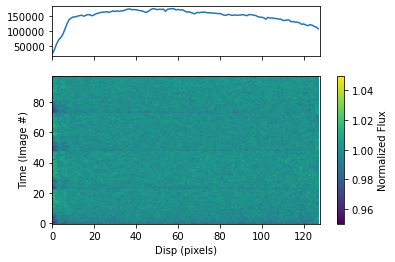

In [54]:
#checking the original dynamic spectrum 
spec_v3.plot_dynamic_spec(showPlot=True)

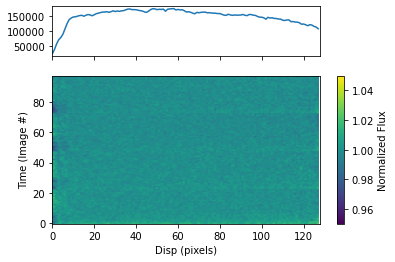

In [55]:
#checking the new dynamic spectrum 
new_spec_v3.plot_dynamic_spec(showPlot=True)

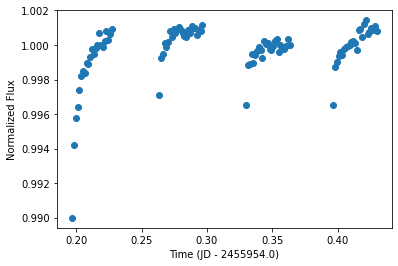

In [56]:
#original light curve
spec_v3.plot_wavebin_series(nbins=1,savePlot=False)

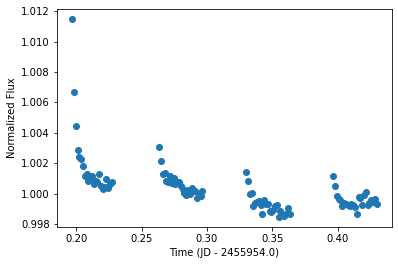

In [57]:
#new light curve
new_spec_v3.plot_wavebin_series(nbins=1,savePlot=False)

## Organizing CoRoT-1b Visit 4 Data

In [58]:
#creating a table of data

#flux values
corot1_visit4_flux=result[3][0]
corot1_visit4_flux = corot1_visit4_flux.to_pandas()

#error flux values
corot1_visit4_errors = result[3][1]
corot1_visit4_errors = corot1_visit4_errors.to_pandas()

# place all flt files of the first visit into an array
corot1_visit4_files = os.listdir('/home/kglidic/Software/tshirt_files/tshirt/corot1_visit4/')
#remove the direct image from this array
corot1_visit4_files.remove('ibh721olq_flt.fits')

#make this a dataframe
corot1_visit4_files =pd.DataFrame(corot1_visit4_files,columns = ['file name'])

#time values for the first visit
corot1_visit4_added = Table()
time_visit4 = Time(corot1_visit4_flux['Time'],format='jd')
corot1_visit4_added['Time (UTC)'] = time_visit4.fits
corot1_visit4_added['Time'] = time_visit4.jd
time_visit4 = pd.DataFrame(corot1_visit4_added['Time (UTC)'])
ttime_visit4 = pd.DataFrame(corot1_visit4_added['Time'])

#Value of the exposure time which is the same for all visits in this case 
#To check this value:
#spec = bspec.return_spec_obj(ind=3)
#head = fits.getheader(spec.specFile,extname='ORIG HEADER')
#head['EXPTIME']
expTime=np.full((98, 1), 100.651947, dtype=np.float64)
expTime = pd.DataFrame(expTime,columns = ['Exp Time'])

#assign a number to the orbits 
orbit1 = np.full((23,1), 0, dtype=np.float64)
orbit2 = np.full((25,1), 1, dtype=np.float64)
orbit3 = np.full((25,1),2,dtype=np.float64)
orbit4 = np.full((25,1),3,dtype=np.float64)
orbits_visit4 = (orbit1,orbit2,orbit3,orbit4)
orbits_visit4 = np.concatenate(orbits_visit4)
orbits_visit4 = pd.DataFrame(orbits_visit4,columns = ['orbit'])

#the filter
Filter = np.full((98,1), 'G141')
Filter = pd.DataFrame(Filter,columns = ['Filter'])

In [59]:
merged4=pd.merge(corot1_visit4_flux, corot1_visit4_errors, on=['Time'])
data4 = [corot1_visit4_files,time_visit4,ttime_visit4,expTime,orbits_visit4,Filter]
data_added4= pd.concat(data4,axis=1)
corot1_visit4_results=pd.merge(data_added4,merged4,on=['Time'])
corot1_visit4_results.to_csv('corot1_visit4_results.csv')
#corot1_visit4_results.to_csv('corot1_visit4_results.csv')
corot1_visit4_results

,file name,Time (UTC),Time,Exp Time,orbit,Filter,6.000um Flux,18.500um Flux,31.500um Flux,44.500um Flux,...,6.000um Error,18.500um Error,31.500um Error,44.500um Error,57.500um Error,70.000um Error,82.500um Error,95.500um Error,108.500um Error,121.500um Error
0,ibh721omq_flt.fits,2012-02-05T17:54:45.000,2.455963e+06,100.651947,0.0,G141,0.988609,0.985877,0.986262,0.987255,...,0.000544,0.000453,0.000444,0.000432,0.000427,0.000466,0.000454,0.000455,0.000480,0.000515
1,ibh721onq_flt.fits,2012-02-05T17:56:44.000,2.455963e+06,100.651947,0.0,G141,0.993580,0.991902,0.993161,0.992491,...,0.000546,0.000457,0.000446,0.000434,0.000428,0.000467,0.000455,0.000456,0.000480,0.000515
2,ibh721ooq_flt.fits,2012-02-05T17:58:43.000,2.455963e+06,100.651947,0.0,G141,0.994061,0.993652,0.994166,0.993636,...,0.000544,0.000455,0.000445,0.000434,0.000428,0.000468,0.000455,0.000456,0.000481,0.000515
3,ibh721opq_flt.fits,2012-02-05T18:00:42.000,2.455963e+06,100.651947,0.0,G141,0.996583,0.996904,0.995235,0.996212,...,0.000545,0.000455,0.000445,0.000434,0.000429,0.000468,0.000455,0.000456,0.000481,0.000515
4,ibh721oqq_flt.fits,2012-02-05T18:02:41.000,2.455963e+06,100.651947,0.0,G141,0.997549,0.996560,0.997554,0.997565,...,0.000546,0.000456,0.000446,0.000434,0.000428,0.000468,0.000456,0.000457,0.000481,0.000515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ibh721req_flt.fits,2012-02-05T23:18:03.000,2.455963e+06,100.651947,3.0,G141,0.998786,1.000215,1.003010,1.001499,...,0.000552,0.000458,0.000446,0.000435,0.000430,0.000469,0.000457,0.000458,0.000483,0.000517
94,ibh721rfq_flt.fits,2012-02-05T23:20:02.000,2.455963e+06,100.651947,3.0,G141,1.001982,1.000862,1.002912,1.001665,...,0.000547,0.000458,0.000447,0.000435,0.000430,0.000469,0.000457,0.000458,0.000482,0.000517
95,ibh721rgq_flt.fits,2012-02-05T23:22:01.000,2.455963e+06,100.651947,3.0,G141,1.000450,1.001012,1.002821,0.998920,...,0.000554,0.000458,0.000446,0.000435,0.000429,0.000469,0.000457,0.000458,0.000482,0.000517
96,ibh721rhq_flt.fits,2012-02-05T23:24:00.000,2.455963e+06,100.651947,3.0,G141,1.002319,1.000632,1.001247,1.000863,...,0.000549,0.000458,0.000447,0.000434,0.000429,0.000469,0.000457,0.000458,0.000482,0.000517


## Creating a Median Image Visit 4

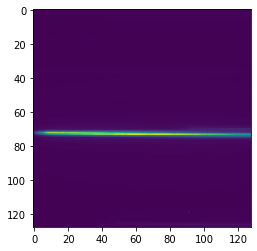

In [60]:
#get information from the header of one of the files in this visit
head_visit4 = fits.getheader('/home/kglidic/Software/tshirt_files/tshirt/corot1_visit4/ibh721omq_flt.fits',extname='SCI')
#head

#python order them from z,y,x:
cube3d_visit4 = np.zeros([len(corot1_visit4_results),head_visit4['NAXIS2'],head_visit4['NAXIS1']])
cube3d_visit4.shape

#loop through all the image in this visit 
for ind,oneFile in enumerate(corot1_visit4_results['file name']):
    cube3d_visit4[ind,:,:] = fits.getdata("/home/kglidic/Software/tshirt_files/tshirt/corot1_visit4/{}".format(oneFile),extname='SCI')

#view one of the images
#%matplotlib inline
#plt.plot(cube3d_v2[15,:,40])
#plt.xlim(60,80)

#create the median image and plot
medianImage_visit4 = np.median(cube3d_visit4,axis=0)
plt.imshow(medianImage_visit4)

outHDU_visit4 = fits.PrimaryHDU(medianImage_visit4,head_visit4)
#outHDU_visit4.writeto('corot1_visit4_median_image.fits')

## RECTE Example Code
CoRoT1-b Visit4

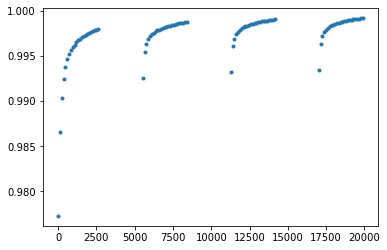

In [61]:
#! /usr/bin/env python
"""calculate RECTE model using a a template grism Image
"""
from __future__ import division, absolute_import
from __future__ import print_function
import numpy as np
import itertools

import matplotlib.pyplot as plt


def RECTE(
        cRates,
        tExp,
        exptime=100.651947,
        trap_pop_s=0,
        trap_pop_f=0,
        dTrap_s=0,
        dTrap_f=0,
        dt0=0,
        lost=0,
        mode='staring'
):
    """Hubble Space Telescope ramp effet model

    Parameters:
    cRates -- intrinsic count rate of each exposures, unit e/s
    tExp -- start time of every exposures
    expTime -- (default 180 seconds) exposure time of the time series
    trap_pop -- (default 0) number of occupied traps at the beginning of the observations
    dTrap -- (default [0])number of extra trap added in the gap
    between two orbits
    dt0 -- (default 0) possible exposures before very beginning, e.g.,
    possible guiding adjustment
    lost -- (default 0, no lost) proportion of trapped electrons that are not eventually detected
    (mode) -- (default scanning, scanning or staring, or others), for scanning mode
      observation , the pixel no longer receive photons during the overhead
      time, in staring mode, the pixel keps receiving elctrons
    """
    nTrap_s = 2192  # = 1525.38  # 1320.0
    eta_trap_s = 0.02075  # = 0.013318  # 0.01311
    tau_trap_s = 1.63e4  # = 1.63e4
    nTrap_f = 225.7  # = 162.38
    eta_trap_f = 0.0116  # = 0.008407
    tau_trap_f = 3344  # = 281.463
    # nTrap_s = 1525.38  # 1320.0
    # eta_trap_s = 0.013318  # 0.01311
    # tau_trap_s = 1.63e4
    # nTrap_f = 162.38
    # eta_trap_f = 0.008407
    # tau_trap_f = 281.463

    try:
        dTrap_f = itertools.cycle(dTrap_f)
        dTrap_s = itertools.cycle(dTrap_s)
        dt0 = itertools.cycle(dt0)
    except TypeError:
        dTrap_f = itertools.cycle([dTrap_f])
        dTrap_s = itertools.cycle([dTrap_s])
        dt0 = itertools.cycle([dt0])
    obsCounts = np.zeros(len(tExp))
    trap_pop_s = min(trap_pop_s, nTrap_s)
    trap_pop_f = min(trap_pop_f, nTrap_f)
    dEsList = np.zeros(len(tExp))
    dEfList = np.zeros(len(tExp))
    dt0_i = next(dt0)
    f0 = cRates[0]
    c1_s = eta_trap_s * f0 / nTrap_s + 1 / tau_trap_s  # a key factor
    c1_f = eta_trap_f * f0 / nTrap_f + 1 / tau_trap_f
    dE0_s = (eta_trap_s * f0 / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
    dE0_f = (eta_trap_f * f0 / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
    dE0_s = min(trap_pop_s + dE0_s, nTrap_s) - trap_pop_s
    dE0_f = min(trap_pop_f + dE0_f, nTrap_f) - trap_pop_f
    trap_pop_s = min(trap_pop_s + dE0_s, nTrap_s)
    trap_pop_f = min(trap_pop_f + dE0_f, nTrap_f)
    for i in range(len(tExp)):
        try:
            dt = tExp[i+1] - tExp[i]
        except IndexError:
            dt = exptime
        f_i = cRates[i]
        c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
        c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
        # number of trapped electron during one exposure
        dE1_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * exptime))
        dE1_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * exptime))
        dE1_s = min(trap_pop_s + dE1_s, nTrap_s) - trap_pop_s
        dE1_f = min(trap_pop_f + dE1_f, nTrap_f) - trap_pop_f
        trap_pop_s = min(trap_pop_s + dE1_s, nTrap_s)
        trap_pop_f = min(trap_pop_f + dE1_f, nTrap_f)
        obsCounts[i] = f_i * exptime - dE1_s - dE1_f
        if dt < 5 * exptime:  # whether next exposure is in next batch of exposures
            # same orbits
            if mode == 'scanning':
                # scanning mode, no incoming flux between exposures
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
                dEsList[i] = dE1_s + dE2_s
                dEfList[i] = dE1_f + dE2_f
            elif mode == 'staring':
                # for staring mode, there is flux between exposures
                dE2_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * (dt - exptime)))
                dE2_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * (dt - exptime)))
            else:
                # others, same as scanning
                dE2_s = - trap_pop_s * (1 - np.exp(-(dt - exptime)/tau_trap_s))
                dE2_f = - trap_pop_f * (1 - np.exp(-(dt - exptime)/tau_trap_f))
            trap_pop_s = min(trap_pop_s + dE2_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE2_f, nTrap_f)
        elif dt < 1200:
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime)/tau_trap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime)/tau_trap_f), nTrap_f)
        else:
            # switch orbit
            dt0_i = next(dt0)
            trap_pop_s = min(trap_pop_s * np.exp(-(dt-exptime-dt0_i)/tau_trap_s) + next(dTrap_s), nTrap_s)
            trap_pop_f = min(trap_pop_f * np.exp(-(dt-exptime-dt0_i)/tau_trap_f) + next(dTrap_f), nTrap_f)
            f_i = cRates[i + 1]
            c1_s = eta_trap_s * f_i / nTrap_s + 1 / tau_trap_s  # a key factor
            c1_f = eta_trap_f * f_i / nTrap_f + 1 / tau_trap_f
            dE3_s = (eta_trap_s * f_i / c1_s - trap_pop_s) * (1 - np.exp(-c1_s * dt0_i))
            dE3_f = (eta_trap_f * f_i / c1_f - trap_pop_f) * (1 - np.exp(-c1_f * dt0_i))
            dE3_s = min(trap_pop_s + dE3_s, nTrap_s) - trap_pop_s
            dE3_f = min(trap_pop_f + dE3_f, nTrap_f) - trap_pop_f
            trap_pop_s = min(trap_pop_s + dE3_s, nTrap_s)
            trap_pop_f = min(trap_pop_f + dE3_f, nTrap_f)
        trap_pop_s = max(trap_pop_s, 0)
        trap_pop_f = max(trap_pop_f, 0)

    return obsCounts

def RECTEMulti(template,
                 variability,
                 tExp,
                 exptime,
                 trap_pop_s=0,
                 trap_pop_f=0,
                 dTrap_s=0,
                 dTrap_f=0,
                 dt0=0,
                 mode='staring'):
    """loop through every pixel in the template
    calculate for 6 orbit
    return
    model light curves

    template -- a template image of the input sereis
    variablities -- normalized model light curves
    tExp -- starting times of each exposure of the time resolved observations
    trap_pop_s -- (default=0)number of initially occupied traps -- slow poplulation
    trap_pop_f -- number of initially occupied traps -- fast poplulation
    dTrap_s -- (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    dTrap_f -- (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    """
    specShape = template.shape
    outSpec = np.zeros((specShape[0], len(tExp)))
    for i in range(specShape[0]):
        outSpec[i, :] = RECTE(
            variability * template[i],
            tExp,
            exptime,
            trap_pop_s,
            trap_pop_f,
            dTrap_s=dTrap_s,
            dTrap_f=dTrap_f,
            dt0=dt0,
            lost=0,
            mode=mode)
    return np.sum(outSpec, axis=(0))

if __name__ == '__main__':
    import pandas as pd
    from astropy.io import fits
    import pickle
    info = pd.read_csv(
        'corot1_visit4_results.csv',
        parse_dates=True,
        index_col='Time (UTC)')
    info['Time'] = np.float32(info.index - info.index.values[0]) / 1e9
    grismInfo = info[info['Filter'] == 'G141']
    exptime = grismInfo['Exp Time'].values[0]
    tExp = grismInfo['Time'].values
    tExp = tExp - tExp[0]
    # cRates = np.ones(len(LC)) * LC.mean() * 1.002
    cRates = np.ones(len(tExp))
    variability = cRates / cRates.mean()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = fits.getdata('corot1_visit4_median_image.fits')
    bbox = [0, 128, 59, 89]  # define the bounding box of the area of interest
    xList = np.arange(bbox[0], bbox[1])
    ramps = np.zeros((len(xList), len(tExp)))
    dTrap_fList = [0]
    dTrap_sList = [0]
    dtList = [0]
    full_well = 8e4
    for i, x in enumerate(xList):
        template = im[bbox[2]:bbox[3], x]
        for j, flux in enumerate(template):
            if flux * exptime > full_well:
                template[j] = full_well / exptime

        obs = RECTEMulti(template, variability, tExp, exptime,
                         dTrap_f=dTrap_fList,
                         dTrap_s=dTrap_sList,
                         trap_pop_f=0,
                         trap_pop_s=0,
                         dt0=dtList,
                         mode='staring')
        obs = obs / exptime / np.nansum(template)
        # ax.plot(tExp, obs, '.', color='0.8', ms=1)
        ramps[i, :] = obs
    ax.plot(tExp, ramps[30, :], '.')
    plt.show()

In [62]:
def charge_correction(self):
    HDUList = fits.open(self.specFile)
    origData = HDUList['OPTIMAL SPEC'].data
    
    newData = deepcopy(origData)
    newData[0,:,:] = origData[0,:,:] / ramps.transpose()
    
    HDUList['OPTIMAL SPEC'].data = newData
    correctedSpecFile = os.path.splitext(self.specFile)[0]+'_corrected.fits'
    HDUList.writeto(correctedSpecFile,overwrite=True)
    
    new_param = deepcopy(self.param)
    new_param['srcNameShort'] = 'corot1_corrected'
    new_spec = spec_pipeline.spec(directParam=new_param)
    new_spec.specFile = correctedSpecFile

    
    return newData,new_spec

In [63]:
spec_v4 = bspec.return_spec_obj(ind=3)
spec_v4.specFile

'./tser_data/spec/spec_corot1_visit4.fits'

In [64]:
correcteddata_v4, new_spec_v4 = charge_correction(spec_v4)
correcteddata_v4

array([[[ 23748.69529325,  36142.98468743,  54126.95160807, ...,
         117629.42255731, 116669.49180733, 113242.92203208],
        [ 23845.73055905,  36456.38881109,  53719.28729156, ...,
         118082.12263405, 116419.92221127, 112166.83533688],
        [ 23669.91089675,  35970.43964195,  53556.61196766, ...,
         117670.40682135, 115984.98730811, 112427.97525135],
        ...,
        [ 23519.92945911,  35853.1944955 ,  52794.60540903, ...,
         116604.26580967, 115748.73368239, 111089.48856179],
        [ 23988.9214943 ,  35846.90360792,  53290.17255226, ...,
         117164.02335149, 114909.21096906, 111476.70356573],
        [ 23136.06554263,  35092.89985437,  52950.19899191, ...,
         116297.00510754, 115125.51901251, 111455.70976116]]])

In [65]:
#Double checking we are in the right place
#new_spec.param['nightName']
#spec.param['nightName']
#print(new_spec_v4.dyn_specFile())
#print(spec_v4.dyn_specFile())

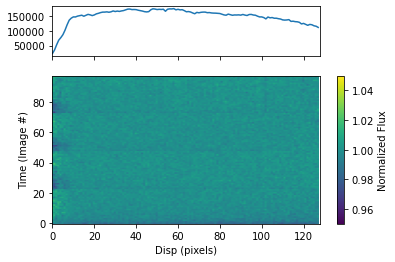

In [66]:
#checking the original dynamic spectrum 
spec_v4.plot_dynamic_spec(showPlot=True)

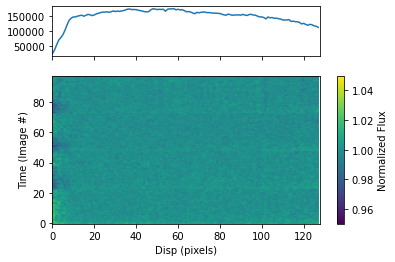

In [67]:
#checking the new dynamic spectrum 
new_spec_v4.plot_dynamic_spec(showPlot=True)

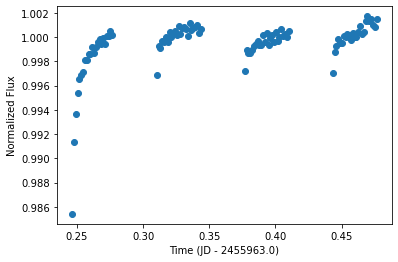

In [68]:
#original light curve
spec_v4.plot_wavebin_series(nbins=1,savePlot=False)

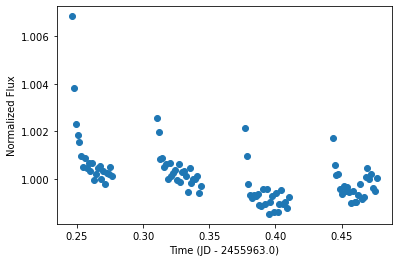

In [69]:
#new light curve
new_spec_v4.plot_wavebin_series(nbins=1,savePlot=False)